## Introduction

This program is designed for predicting coal's Gross Calorific Value (GCV)

Mainly achieved functions:

(1) Calculation of Descriptive Statistics.

(2) Boxplot for each independent variable and the target variable.

(3) Scatter plots illustrating the relationship between individual coal quality indicators VS GCV.

(4) correlations between variables.

(5) Preprocessing of data for regression analysis models, including dataset splitting into training and testing sets, and standardization.

(6) Training and prediction using 7 different regression analysis models.

(7) Computation of error metrics for the regression analyses.

(8) Visualization of charts related to the error metrics of the regression analyses.


## Data Description
The data being read from <coal_all.csv> contains 10 variables：

(Moisture, Volatile_matter, Fixed_Carbon, Ash, Hydrogen, Carbon, Nitrogen, Oxygen, Sulfur, GCV)

Three sets of data (SET1, SET2, SET3) have been constructed based on different input variables.

SET1 (Moisture, Volatile_matter, Ash, GCV)

SET2 (Carbon, Oxygen, Sulfur, GCV)

SET3 (Moisture, Volatile_matter, Ash, Hydrogen, Carbon, Oxygen, Sulfur, GCV)

In the following code, the SET2 sub-dataset is used. To utilize the other two datasets, simply specify the corresponding variable names in the statements.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from xgboost import XGBRegressor
import cubist
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
print("Import Done")

Import Done


## Boxplots

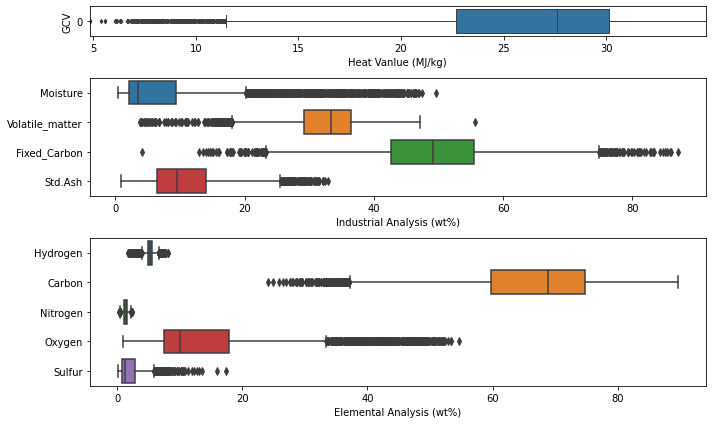

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Load data
data = pd.read_csv("F:/煤质论文2/coal_all.csv")

# Create a canvas and customize the layout height ratio using GridSpec.
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(3, 1, height_ratios=[1, 4, 5])

# GCV
ax0 = fig.add_subplot(gs[0])
sns.boxplot(data=data['GCV'], ax=ax0, orient="h", linewidth=1, fliersize=3)
gcv_min = data['GCV'].min()
gcv_max = data['GCV'].max()
ax0.set_xlim(gcv_min, gcv_max)
ax0.set_xlabel("Heat Vanlue (MJ/kg)")
ax0.set_ylabel("GCV")
#ax0.set_yticklabels("GCV") 

# proximate analysis variables
ax1 = fig.add_subplot(gs[1])
sns.boxplot(data=data[industrial_group], ax=ax1, orient="h")
ax1.set_xlabel('Industrial Analysis (wt%)')

# elemental analysis variables
ax2 = fig.add_subplot(gs[2])
sns.boxplot(data=data[elemental_group], ax=ax2, orient="h")
ax2.set_xlabel('Elemental Analysis (wt%)')

# Adjust the layout to avoid overlap.
plt.tight_layout()

# Save the image
plt.savefig("F:/煤质论文2/coal_boxplot.pdf", dpi=300, bbox_inches='tight')

# Show the image
plt.show()

In [ ]:
data

##  Independent variable VS target variable(GCV) scatterplot

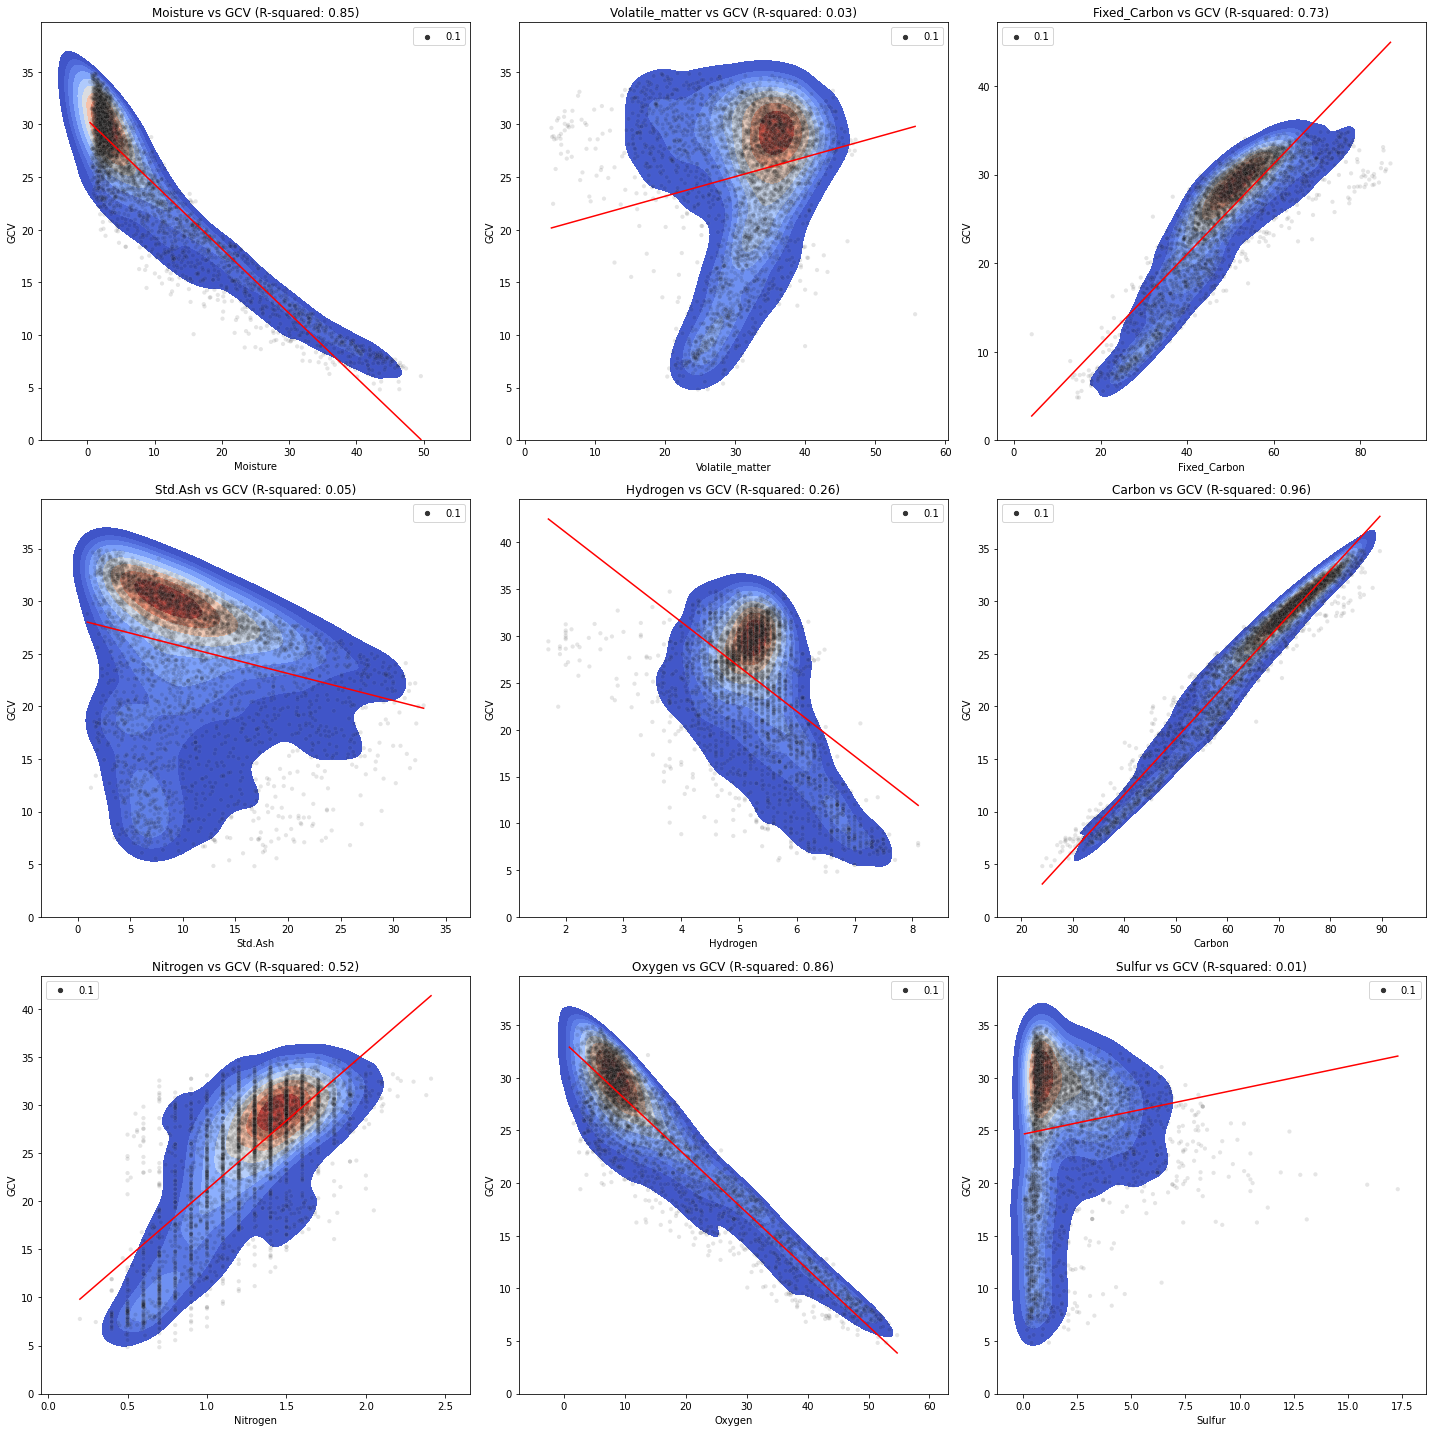

In [16]:
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("F:/煤质论文2/coal_all.csv")

# Create a 3x3 graphical grid.
fig, axs = plt.subplots(3, 3, figsize=(20, 20))  # Can be adjusted in size as needed

# Traverse each feature and plot
for i, feature in enumerate(data.columns[:-1]):
    ax = axs[i // 3, i % 3]  # Calculate the rows and columns of the subgraph
    X = data[[feature]].values
    y = data['GCV'].values

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)

    # Add Kernel Density Plot
    sns.kdeplot(ax=ax, data=data, x=feature, y='GCV', fill=True, cmap='coolwarm')
    ax.set_title(f'{feature} vs GCV (R-squared: {r_squared:.2f})')

    # Plot scatter plot and regression line on the subgraph
    sns.scatterplot(ax=ax, data=data, x=feature, y='GCV', alpha=0.1, size=0.1, color='black')
    sns.lineplot(ax=ax, data=data, x=feature, y=y_pred, color='red')


#Adjust the spacing between subgraphs.
plt.tight_layout()

# Save as PNG
plt.savefig(f'F:/煤质论文2/Scatter_KDE.png', format='png')

plt.show()


## Correlation Heatmap

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
data = pd.read_csv("F:/煤质论文2/coal_all.csv") 

# Draw a Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data[['Moisture', 'Volatile_matter', 'Fixed_Carbon', 'Std.Ash', 'GCV']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Coal Properties')
plt.tight_layout()

# Save as PNG and SVG.
plt.savefig('F:/煤质论文2/Correlation_Heatmap.png', format='png')
plt.savefig('F:/煤质论文2/Correlation_Heatmap.svg', format='svg')

#Clear the current graphics.
plt.close()
print('done!')

done!


## Data preparation for regression analysis

In [28]:
# Read data and determine the input and output variables
data = pd.read_csv("F:/煤质论文2/coal_all.csv")
descriptive_stats = data.describe()
print(descriptive_stats)
# Select the Independent and Dependent Variables
X = data[['Carbon','Sulfur','Oxygen']]
y = data['GCV']
print(X.head())

          Moisture  Volatile_matter  Fixed_Carbon     Std.Ash     Hydrogen  \
count  4540.000000      4540.000000   4540.000000  4540.00000  4540.000000   
mean      8.096839        32.311229     48.745841    10.84609     5.266262   
std       9.907228         6.323509     11.015396     5.97833     0.695405   
min       0.400000         3.800000      4.100000     0.90000     1.700000   
25%       2.200000        29.142500     42.642500     6.40000     4.900000   
50%       3.500000        33.325000     49.230000     9.61500     5.250000   
75%       9.400000        36.550000     55.512500    14.10000     5.590000   
max      49.600000        55.700000     87.000000    32.90000     8.100000   

            Carbon     Nitrogen       Oxygen       Sulfur          GCV  
count  4540.000000  4540.000000  4540.000000  4540.000000  4540.000000  
mean     65.988081     1.296081    14.695225     1.908260    25.466043  
std      12.029952     0.332306    11.270205     1.741105     6.562581  
min  

In [18]:
# Divide the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Data standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('standardization done')
print(X_train_scaled)

standardization done
[[-1.98904408 -0.87043296  2.5908665 ]
 [ 0.38400153  0.19275893 -0.33694853]
 [ 1.14955427 -0.80755602 -0.53441   ]
 ...
 [ 0.73907698  0.67291011 -0.51466385]
 [-2.16532268 -0.81327211  2.59984202]
 [ 0.86582968 -0.45887481 -0.69417428]]


## Regression model training

In [21]:
# Create models
#1-gbdt
gbdt_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=0.8)
#xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=0.8, colsample_bytree=0.8, objective='reg:squarederror')
#2-RFR
rf_model = RandomForestRegressor(n_estimators=500,max_features='auto', max_depth=9, min_samples_split=2, min_samples_leaf=1, bootstrap=True)
#3-MLR
lr_model = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
#mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
#lssvm = SVR(kernel='linear', C=1e3)
#4-CUBIST(Parameters are determined through grid search in the R language script.)
cubist_model = cubist.Cubist(n_committees =100,neighbors=9)
# 5-SVR
svr_model = SVR(C=10, epsilon=0.1, gamma=0.1) 
# 6-BPNN（Use MLPRegressor to simulate BPNN.）
bpnn_model = MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', alpha=0.3, batch_size=200, learning_rate_init=0.05, momentum=0.9, validation_fraction=0.2, shuffle=True, random_state=0, tol=1e-4, max_iter=2000)
# 7-PSO_ANN模型（Use MLPRegressor to simulate PSO_ANN，Parameters are determined through the PSO algorithm, in another python script.）
PSO_ANN_model = MLPRegressor(hidden_layer_sizes=(21, 12), activation='relu', solver='adam', alpha=0.3, batch_size=200, learning_rate_init=0.05, momentum=0.9, validation_fraction=0.2, shuffle=True, random_state=0, tol=1e-4, max_iter=2000)


In [22]:
# Training
gbdt_model.fit(X_train_scaled, y_train)
print("1-gbdt training complete。")
#xgb_model.fit(X_train_scaled, y_train)
#print("2-xgb training complete。")
rf_model.fit(X_train_scaled, y_train)
print("2-rf training complete。")
#mlp.fit(X_train_scaled, y_train)
#print("4-mlp training complete。")
lr_model.fit(X_train_scaled, y_train)
print("3-lr training complete。")
cubist_model.fit(X_train_scaled, y_train)
print("4-cubist training complete。")
svr_model.fit(X_train_scaled, y_train) 
print("5-svr training complete。") 
#lssvm.fit(X_train_scaled, y_train)
#print("6-lssvm training complete。")
bpnn_model.fit(X_train_scaled, y_train)
print("6-bpnn training complete。")
PSO_ANN_model.fit(X_train_scaled, y_train)
print("7-PSO_ANN training complete。")


1-gbdt training complete。
2-rf training complete。


F:\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


3-lr training complete。
4-cubist training complete。
5-svr training complete。
6-bpnn training complete。
7-PSO_ANN training complete。


## Regression model prediction

In [23]:
# Prediction
gbdt_pred = gbdt_model.predict(X_test_scaled)
# xgb_pred = xgb_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
# mlp_pred = mlp.predict(X_test_scaled)
lr_pred = lr_model.predict(X_test_scaled)
cubist_pred = cubist_model.predict(X_test_scaled)
svr_pred = svr_model.predict(X_test_scaled)
# lssvm_pred = lssvm.predict(X_test_scaled)
bpnn_pred = bpnn_model.predict(X_test_scaled)
PSO_ANN_pred = PSO_ANN_model.predict(X_test_scaled)
print("Prediction complete。")


F:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Cubist was fitted with feature names
  warnings.warn(


Prediction complete。


In [24]:
def calculate_mape(actual, predicted):
    return 100 * abs((actual - predicted).sum() / actual.sum())

import math
# Regression Analysis Evaluation Metrics:MAE, MSE, RMSE, R2, MAPE
# 1-GBDT
gbdt_mae = mean_absolute_error(y_test, gbdt_pred)
gbdt_mse = mean_squared_error(y_test, gbdt_pred)
gbdt_r2 = r2_score(y_test, gbdt_pred)
gbdt_rmse = math.sqrt(gbdt_mse)
gbdt_mape = calculate_mape(y_test, gbdt_pred)

# XGB
# xgb_mae = mean_absolute_error(y_test, xgb_pred)
# xgb_mse = mean_squared_error(y_test, xgb_pred)
# xgb_r2 = r2_score(y_test, xgb_pred)
# xgb_rmse = math.sqrt(xgb_mse)
# xgb_mape = calculate_mape(y_test, xgb_pred)

#2-RFR
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = math.sqrt(rf_mse)
rf_mape = calculate_mape(y_test, rf_pred)

#3-MLR
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = math.sqrt(lr_mse)
lr_mape = calculate_mape(y_test, lr_pred)

#4-Cubist
cubist_mae = mean_absolute_error(y_test, cubist_pred)
cubist_mse = mean_squared_error(y_test, cubist_pred)
cubist_r2 = r2_score(y_test, cubist_pred)
cubist_rmse = math.sqrt(cubist_mse)
cubist_mape = calculate_mape(y_test, cubist_pred)

#5-SVR
svr_mae = mean_absolute_error(y_test, svr_pred) 
svr_mse = mean_squared_error(y_test, svr_pred) 
svr_r2 = r2_score(y_test, svr_pred) 
svr_rmse = math.sqrt(svr_mse) 
svr_mape = calculate_mape(y_test, svr_pred)

# LSSVM
#lssvm_mae = mean_absolute_error(y_test, lssvm_pred)
#lssvm_mse = mean_squared_error(y_test, lssvm_pred)
#lssvm_r2 = r2_score(y_test, lssvm_pred)
#lssvm_rmse = np.sqrt(lssvm_mse)
#lssvm_mape = calculate_mape(y_test, lssvm_pred)

# MLP-ANN
#mlp_mae = mean_absolute_error(y_test, mlp_pred)
#mlp_mse = mean_squared_error(y_test, mlp_pred)
#mlp_r2 = r2_score(y_test, mlp_pred)
#mlp_rmse = np.sqrt(mlp_mse)
#mlp_mape = calculate_mape(y_test, mlp_pred)

#6-BPNN
bpnn_mae = mean_absolute_error(y_test, bpnn_pred.flatten()) 
bpnn_mse = mean_squared_error(y_test, bpnn_pred.flatten()) 
bpnn_r2 = r2_score(y_test, bpnn_pred.flatten()) 
bpnn_rmse = math.sqrt(bpnn_mse) 
bpnn_mape = calculate_mape(y_test, bpnn_pred.flatten())

#7-PSO_ANN
PSO_ANN_mae = mean_absolute_error(y_test, PSO_ANN_pred.flatten()) 
PSO_ANN_mse = mean_squared_error(y_test, PSO_ANN_pred.flatten()) 
PSO_ANN_r2 = r2_score(y_test, PSO_ANN_pred.flatten()) 
PSO_ANN_rmse = math.sqrt(PSO_ANN_mse) 
PSO_ANN_mape = calculate_mape(y_test, PSO_ANN_pred.flatten())

print("1-GBDT: MAE={}, MSE={}, RMSE={}, R2={}, MAPE={}%".format(gbdt_mae, gbdt_mse, gbdt_rmse, gbdt_r2, gbdt_mape))
#print("XGBoost: MAE={}, MSE={}, RMSE={}, R2={}, MAPE={}%".format(xgb_mae, xgb_mse, xgb_rmse, xgb_r2, xgb_mape))
print("2-Random Forest: MAE={}, MSE={}, RMSE={}, R2={}, MAPE={}%".format(rf_mae, rf_mse, rf_rmse, rf_r2, rf_mape))
print("3-Linear Regression: MAE={}, MSE={}, RMSE={}, R2={}, MAPE={}%".format(lr_mae, lr_mse, lr_rmse, lr_r2, lr_mape))
#print("MLP-ANN: MAE={}, MSE={}, RMSE={}, R2={}, MAPE={}%".format(mlp_mae, mlp_mse, mlp_rmse, mlp_r2, mlp_mape))
#print("LSSVM: MAE={}, MSE={}, RMSE={}, R2={}, MAPE={}%".format(lssvm_mae, lssvm_mse, lssvm_rmse, lssvm_r2, lssvm_mape))
print("4-Cubist: MAE={}, MSE={}, RMSE={}, R2={}, MAPE={}%".format(cubist_mae, cubist_mse, cubist_rmse, cubist_r2, cubist_mape))
print("5-SVR: MAE={}, MSE={}, RMSE={}, R2={}, MAPE={}%".format(svr_mae, svr_mse, svr_rmse, svr_r2, svr_mape)) 
print("6-BPNN: MAE={}, MSE={}, RMSE={}, R2={}, MAPE={}%".format(bpnn_mae, bpnn_mse, bpnn_rmse, bpnn_r2, bpnn_mape)) 
print("7-PSO_ANN: MAE={}, MSE={}, RMSE={}, R2={}, MAPE={}%".format(PSO_ANN_mae, PSO_ANN_mse, PSO_ANN_rmse, PSO_ANN_r2, PSO_ANN_mape))


1-GBDT: MAE=0.4025283227522395, MSE=0.38080837590054406, RMSE=0.617096731396743, R2=0.99174515001991, MAPE=0.116214928847986%
2-Random Forest: MAE=0.3948855643889184, MSE=0.3835728984712334, RMSE=0.6193326234514321, R2=0.9916852229790889, MAPE=0.14242692212215674%
3-Linear Regression: MAE=0.5264471473691721, MSE=0.5802758930403557, RMSE=0.7617584217062229, R2=0.9874212576527941, MAPE=0.2281903616161836%
4-Cubist: MAE=0.3805236918395754, MSE=0.35578633218712125, RMSE=0.5964782746983508, R2=0.9922875572517916, MAPE=0.1400144218117931%
5-SVR: MAE=0.37246369606699153, MSE=0.3670543538539415, RMSE=0.6058501084046627, R2=0.9920432983690609, MAPE=0.32639949767881005%
6-BPNN: MAE=0.4519441210051775, MSE=0.4649414878373694, RMSE=0.6818661803003353, R2=0.9899213817906681, MAPE=0.4126016267258452%
7-PSO_ANN: MAE=0.400729305880421, MSE=0.34959613371974607, RMSE=0.5912665504827295, R2=0.9924217432700858, MAPE=0.16935604798766168%


## Visualization of regression analysis results

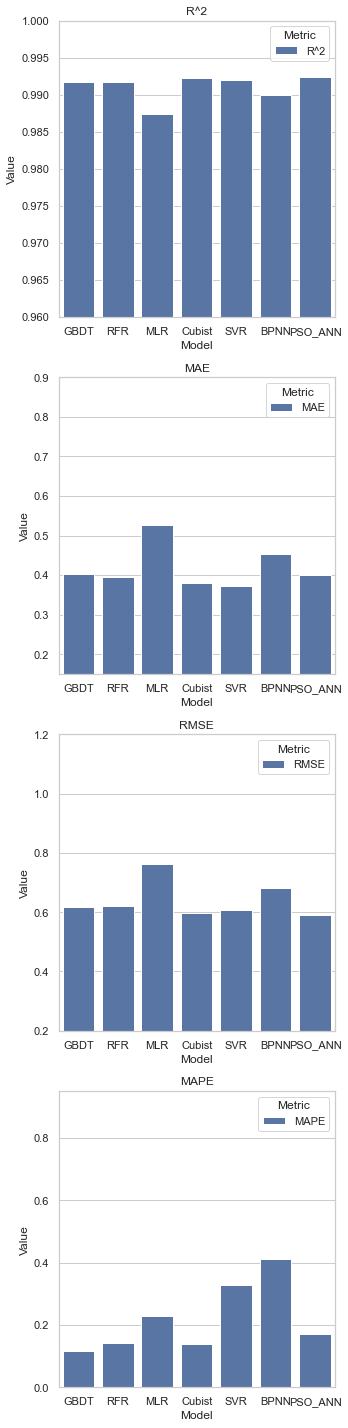

In [25]:
#Draw the Error Metric Histograms
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Global Font Size
plt.rcParams['font.size'] = 9

# Prepare data
models = ['GBDT', 'RFR', 'MLR', 'Cubist', 'SVR', 'BPNN', 'PSO_ANN']
mae = [gbdt_mae, rf_mae, lr_mae, cubist_mae, svr_mae, bpnn_mae, PSO_ANN_mae]
r2 = [gbdt_r2, rf_r2, lr_r2, cubist_r2, svr_r2, bpnn_r2, PSO_ANN_r2]
rmse = [gbdt_rmse, rf_rmse, lr_rmse, cubist_rmse, svr_rmse, bpnn_rmse, PSO_ANN_rmse]
mape = [gbdt_mape, rf_mape, lr_mape, cubist_mape, svr_mape, bpnn_mape, PSO_ANN_mape]

# Create a dataframe
data = pd.DataFrame({
    'Model': models * 4,
    'Metric': ['R^2'] * 7 + ['MAE'] * 7 + ['RMSE'] * 7 + ['MAPE'] * 7,  
    'Value': r2 + mae + rmse + mape  
})

# Set the drawing style
sns.set(style="whitegrid")

# Create a plotting object and a 4x1 subplot layout.
fig, axes = plt.subplots(4, 1, figsize=(5, 20), sharey=False)  # Adjust the figsize to fit a 4x1 layout.

# Create bar chart for each indicator.
sns.barplot(x='Model', y='Value', hue='Metric', data=data[data['Metric'] == 'R^2'], ax=axes[0])
axes[0].set_ylim(bottom=0.96, top=1.00)
sns.barplot(x='Model', y='Value', hue='Metric', data=data[data['Metric'] == 'MAE'], ax=axes[1])
axes[1].set_ylim(bottom=0.15, top=0.9)
sns.barplot(x='Model', y='Value', hue='Metric', data=data[data['Metric'] == 'RMSE'], ax=axes[2])
axes[2].set_ylim(bottom=0.2, top=1.2)
sns.barplot(x='Model', y='Value', hue='Metric', data=data[data['Metric'] == 'MAPE'], ax=axes[3])
axes[3].set_ylim(bottom=0, top=0.95)

# Set title for each subplot
axes[0].set_title('R^2')
axes[1].set_title('MAE')
axes[2].set_title('RMSE')
axes[3].set_title('MAPE')

plt.tight_layout()

plt.savefig('regression_model_performance2.png', format='png')
plt.savefig('regression_model_performance2.pdf', format='pdf')

plt.show()

In [ ]:
Pred vs Actual scaterplot

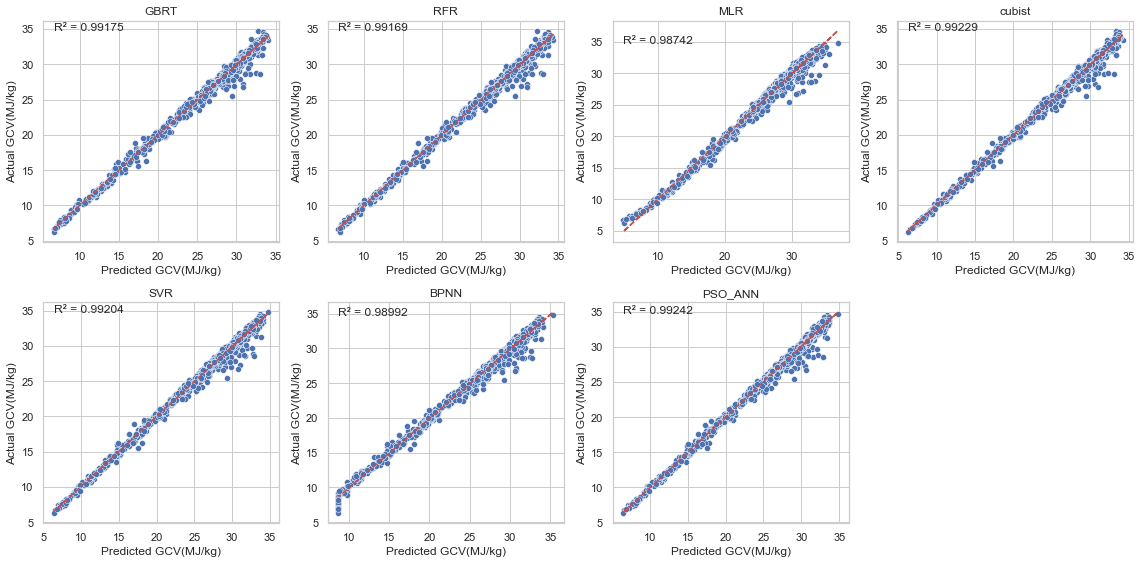

Done!


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# gbdt_pred, rf_pred, lr_pred, cubist_pred, svr_pred, bpnn_pred, PSO_ANN_pred, y_test

#Create a PDF file
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rc
rc("pdf", fonttype=3) 
pdf = PdfPages('F:/煤质论文2/coal_pred.pdf')  # Specify the PDF file name and path

# Set figure size
plt.figure(figsize=(16, 8))

# GBDT
plt.subplot(2, 4, 1)
sns.scatterplot(x=gbdt_pred, y=y_test)
z = np.polyfit(gbdt_pred, y_test, 1)
p = np.poly1d(z)
plt.plot(gbdt_pred, p(gbdt_pred), "r--")
r2 = r2_score(y_test, gbdt_pred)
plt.text(min(gbdt_pred), max(y_test), f'R² = {r2:.5f}')
plt.title('GBRT')
plt.xlabel("Predicted GCV(MJ/kg)")
plt.ylabel("Actual GCV(MJ/kg)")
plt.grid(True)

# RF
plt.subplot(2, 4, 2)
sns.scatterplot(x=rf_pred, y=y_test)
z = np.polyfit(rf_pred, y_test, 1)
p = np.poly1d(z)
plt.plot(rf_pred, p(rf_pred), "r--")
r2 = r2_score(y_test, rf_pred)
plt.text(min(rf_pred), max(y_test), f'R² = {r2:.5f}')
plt.title('RFR')
plt.xlabel("Predicted GCV(MJ/kg)")
plt.ylabel("Actual GCV(MJ/kg)")
plt.grid(True)

# LR
plt.subplot(2, 4, 3)
sns.scatterplot(x=lr_pred, y=y_test)
z = np.polyfit(lr_pred, y_test, 1)
p = np.poly1d(z)
plt.plot(lr_pred, p(lr_pred), "r--")
r2 = r2_score(y_test, lr_pred)
plt.text(min(lr_pred), max(y_test), f'R² = {r2:.5f}')
plt.title('MLR')
plt.xlabel("Predicted GCV(MJ/kg)")
plt.ylabel("Actual GCV(MJ/kg)")
plt.grid(True)

# Cubist
plt.subplot(2, 4, 4)
sns.scatterplot(x=cubist_pred, y=y_test)
z = np.polyfit(cubist_pred, y_test, 1)
p = np.poly1d(z)
plt.plot(cubist_pred, p(cubist_pred), "r--")
r2 = r2_score(y_test, cubist_pred)
plt.text(min(cubist_pred), max(y_test), f'R² = {r2:.5f}')
plt.title('cubist')
plt.xlabel("Predicted GCV(MJ/kg)")
plt.ylabel("Actual GCV(MJ/kg)")
plt.grid(True)

# SVR
plt.subplot(2, 4, 5)
sns.scatterplot(x=svr_pred, y=y_test)
z = np.polyfit(svr_pred, y_test, 1)
p = np.poly1d(z)
plt.plot(svr_pred, p(svr_pred), "r--")
r2 = r2_score(y_test, svr_pred)
plt.text(min(svr_pred), max(y_test), f'R² = {r2:.5f}')
plt.title('SVR')
plt.xlabel("Predicted GCV(MJ/kg)")
plt.ylabel("Actual GCV(MJ/kg)")
plt.grid(True)

# BPNN
plt.subplot(2, 4, 6)
sns.scatterplot(x=bpnn_pred, y=y_test)
z = np.polyfit(bpnn_pred, y_test, 1)
p = np.poly1d(z)
plt.plot(bpnn_pred, p(bpnn_pred), "r--")
r2 = r2_score(y_test, bpnn_pred)
plt.text(min(bpnn_pred), max(y_test), f'R² = {r2:.5f}')
plt.title('BPNN')
plt.xlabel("Predicted GCV(MJ/kg)")
plt.ylabel("Actual GCV(MJ/kg)")
plt.grid(True)

# PSO_ANN
plt.subplot(2, 4, 7)
sns.scatterplot(x=PSO_ANN_pred, y=y_test)
z = np.polyfit(PSO_ANN_pred, y_test, 1)
p = np.poly1d(z)
plt.plot(PSO_ANN_pred, p(PSO_ANN_pred), "r--")
r2 = r2_score(y_test, PSO_ANN_pred)
plt.text(min(PSO_ANN_pred), max(y_test), f'R² = {r2:.5f}')
plt.title('PSO_ANN')
plt.xlabel("Predicted GCV(MJ/kg)")
plt.ylabel("Actual GCV(MJ/kg)")
plt.grid(True)

#Adjust the layout and display the chart.
plt.tight_layout()

# Save the chart as a PDF file.

plt.savefig('coal_pred.png', format='png')
pdf.savefig()  # Save the scatter plot as a PDF.
plt.show() 
pdf.close()  # Close the PDF file.
plt.close()  # Close the current graphic
print("Done!")
